# **Boruta**

In [190]:
pip install boruta

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [192]:
X=pd.DataFrame({'X1':[30,52,65,57,89,78],
                'X2':[200,789,156,754,379,500],
                'X3':[12,78,654,123,456,520]})
y=pd.Series([30,39,41,58,75,90],name='income')

In [193]:
X

,X1,X2,X3
0,30,200,12
1,52,789,78
2,65,156,654
3,57,754,123
4,89,379,456
5,78,500,520


In [194]:
y

0    30
1    39
2    41
3    58
4    75
5    90
Name: income, dtype: int64

In [195]:
np.random.seed(42)
x_shadow=X.apply(np.random.permutation)
x_shadow.columns=['shadow_' + feat for feat in X.columns]
x_boruta=pd.concat([X,x_shadow],axis=1)
x_boruta

,X1,X2,X3,shadow_X1,shadow_X2,shadow_X3
0,30,200,12,30,754,456
1,52,789,78,52,200,78
2,65,156,654,78,789,12
3,57,754,123,65,156,123
4,89,379,456,89,500,520
5,78,500,520,57,379,654


In [196]:
forest_regresor=RandomForestRegressor(max_depth=5,random_state=42)
forest_regresor.fit(x_boruta,y)
### store feature importance
feat_imp_x=forest_regresor.feature_importances_[:len(X.columns)] # las primeras 3 columnas
feat_imp_shadow=forest_regresor.feature_importances_[len(X.columns):] # las ultimas 3 columnas

In [197]:
feat_imp_x

array([0.30709198, 0.08807649, 0.07361747])

In [198]:
feat_imp_shadow

array([0.08642022, 0.15451878, 0.29027507])

In [199]:
hits=feat_imp_x>feat_imp_shadow
hits

array([ True, False, False])

In [200]:
feat_imp_shadow.max()

0.29027506943884895

# **Boruta 1**

In [201]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss
import warnings
warnings.filterwarnings('ignore')

In [202]:
url='https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv'
df=pd.read_csv(url,sep=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [204]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [205]:
y=df['target']
X=df.drop(columns='target',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7,shuffle=True)

In [206]:
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='micro')
    prec = precision_score(y_true, y_pred,average='micro')
    rec = recall_score(y_true, y_pred,average='micro')
    jacc=jaccard_score(y_true,y_pred,average='micro')
    return {'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec,'Jaccard':jacc}

## **Logistic Regression**

In [207]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.7377049180327869,
 'F1 Score': 0.7377049180327869,
 'Precision': 0.7377049180327869,
 'Recall': 0.7377049180327869,
 'Jaccard': 0.5844155844155844}

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



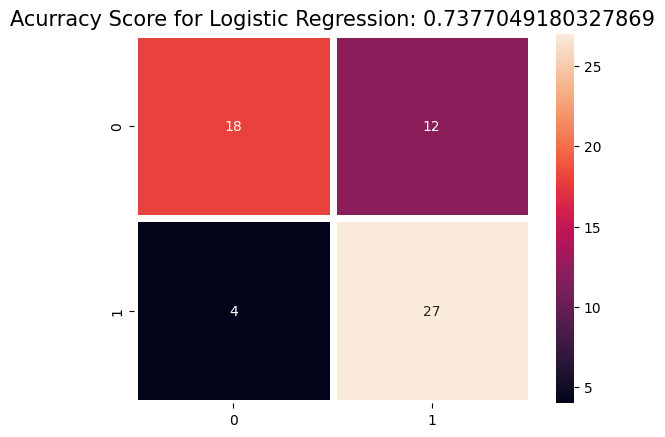

In [209]:
def matrix(model):
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Logistic Regression: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(lr)

## **Ramdon Forest Classifier**

In [210]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.7377049180327869,
 'F1 Score': 0.7377049180327869,
 'Precision': 0.7377049180327869,
 'Recall': 0.7377049180327869,
 'Jaccard': 0.5844155844155844}

In [211]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.70      0.84      0.76        31

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



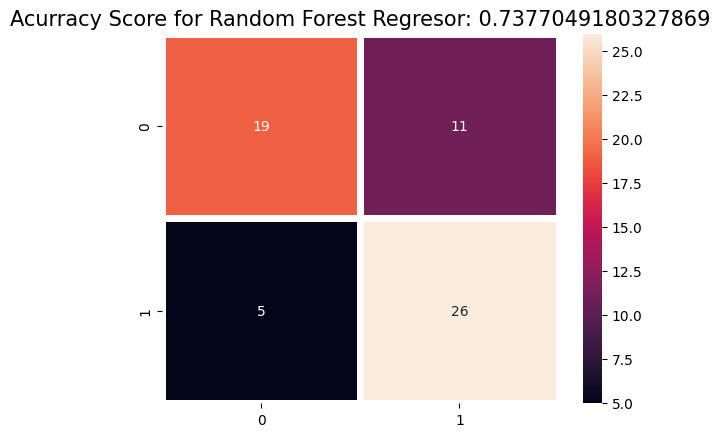

In [212]:
def matrix(model):
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Random Forest Regresor: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(rfc)

## **Support Vector Classifier**

In [213]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.6229508196721312,
 'F1 Score': 0.6229508196721312,
 'Precision': 0.6229508196721312,
 'Recall': 0.6229508196721312,
 'Jaccard': 0.4523809523809524}

In [214]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.33      0.47        30
           1       0.58      0.90      0.71        31

    accuracy                           0.62        61
   macro avg       0.68      0.62      0.59        61
weighted avg       0.67      0.62      0.59        61



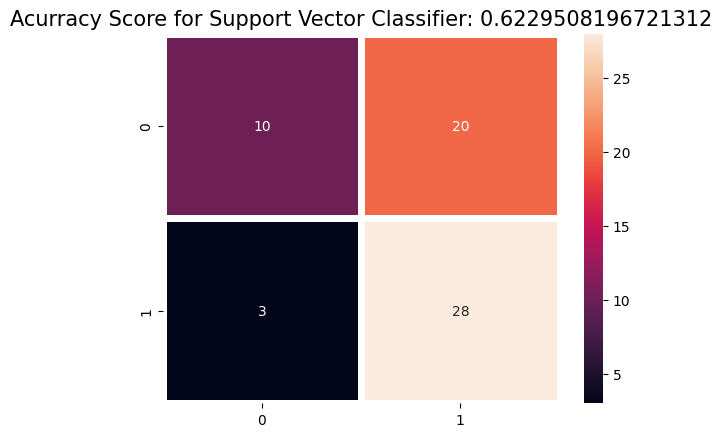

In [215]:
def matrix(model):
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Support Vector Classifier: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(model)

## **Boruta**

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [217]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

feat_selector=BorutaPy(rfc,n_estimators='auto',verbose=2,random_state=1)
X=X.to_numpy()
y=y.to_numpy()
feat_selector.fit(X,y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	3
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	5
Iteration:

BorutaPy(estimator=RandomForestClassifier(n_estimators=37,
                                          random_state=RandomState(MT19937) at 0x7FD0F7D5AC40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FD0F7D5AC40, verbose=2)

In [218]:
feat_selector.support_

array([ True, False,  True, False, False, False, False,  True, False,
        True, False,  True,  True])

In [219]:
print('Ranking : ',feat_selector.ranking_)

Ranking :  [1 6 1 5 3 8 7 1 2 1 4 1 1]


In [220]:
print("No of significant features: ",feat_selector.n_features_)

No of significant features:  6


In [221]:
selected_rf_features=pd.DataFrame({'Feature':list(X_train.columns),
                                   'Ranking':feat_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,age,1
2,cp,1
7,thalach,1
9,oldpeak,1
11,ca,1
12,thal,1
8,exang,2
4,chol,3
10,slope,4
3,trestbps,5


In [222]:
best_features=feat_selector.transform(X)

In [223]:
best_features.shape

(303, 6)

In [224]:
best_features

array([[ 63. ,   3. , 150. ,   2.3,   0. ,   1. ],
       [ 37. ,   2. , 187. ,   3.5,   0. ,   2. ],
       [ 41. ,   1. , 172. ,   1.4,   0. ,   2. ],
       ...,
       [ 68. ,   0. , 141. ,   3.4,   2. ,   3. ],
       [ 57. ,   0. , 115. ,   1.2,   1. ,   3. ],
       [ 57. ,   1. , 174. ,   0. ,   1. ,   2. ]])

In [225]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [226]:
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,age,1
2,cp,1
7,thalach,1
9,oldpeak,1
11,ca,1
12,thal,1
8,exang,2
4,chol,3
10,slope,4
3,trestbps,5


### **Logistic Regression Boruta**

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
rank = ['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal']
X = df[rank]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
calculate_metrics(y_test,y_pred)


(272, 6) (272,)
(31, 6) (31,)


{'Accuracy': 0.9032258064516129,
 'F1 Score': 0.9032258064516129,
 'Precision': 0.9032258064516129,
 'Recall': 0.9032258064516129,
 'Jaccard': 0.8235294117647058}

In [240]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.85      1.00      0.92        17

    accuracy                           0.90        31
   macro avg       0.93      0.89      0.90        31
weighted avg       0.92      0.90      0.90        31



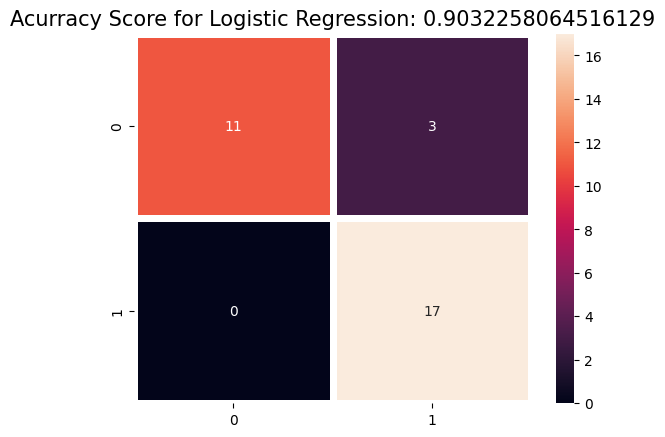

In [241]:
def matrix(model):
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Logistic Regression: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(lr)

### **RandomForestClassifier**

In [242]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.8709677419354839,
 'F1 Score': 0.8709677419354839,
 'Precision': 0.8709677419354839,
 'Recall': 0.8709677419354839,
 'Jaccard': 0.7714285714285715}

In [243]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.84      0.94      0.89        17

    accuracy                           0.87        31
   macro avg       0.88      0.86      0.87        31
weighted avg       0.88      0.87      0.87        31



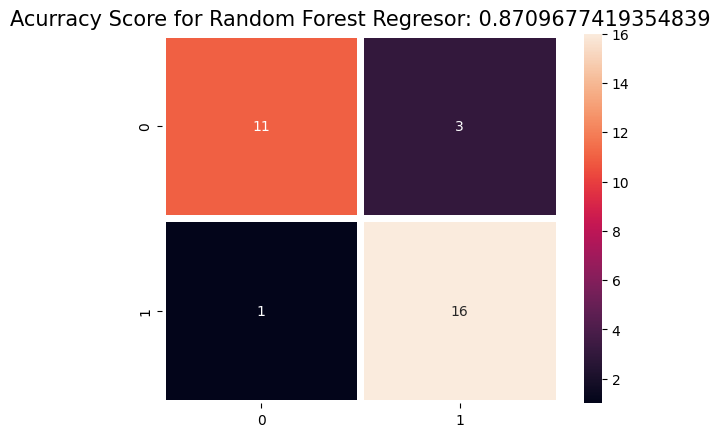

In [244]:
def matrix(model):
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Random Forest Regresor: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(rfc)

### **Support Vector Classifier**

In [245]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.8064516129032258,
 'F1 Score': 0.8064516129032258,
 'Precision': 0.8064516129032258,
 'Recall': 0.8064516129032258,
 'Jaccard': 0.6756756756756757}

In [246]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.74      1.00      0.85        17

    accuracy                           0.81        31
   macro avg       0.87      0.79      0.79        31
weighted avg       0.86      0.81      0.79        31



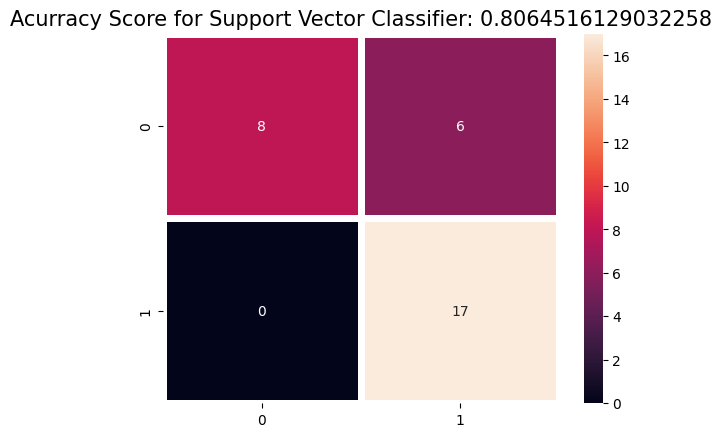

In [247]:
def matrix(model):
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Support Vector Classifier: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(model)